In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from scipy.stats import t as student_t

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Step 1: Generating synthetic price movement data using Markov Chains
# States: 0 = downtrend, 1 = uptrend
states = np.array([0, 1])

In [4]:
# Transition matrix: probability of moving from one state to another
# Example: 0.8 probability of staying in the current state, 0.2 probability of switching
transition_matrix = np.array([[0.8, 0.2],
                              [0.3, 0.7]])

In [5]:
# Simulate state transitions for a certain number of time steps
n_steps = 1000
state_sequence = [np.random.choice(states, p=[0.5, 0.5])]

In [6]:
for _ in range(1, n_steps):
    current_state = state_sequence[-1]
    next_state = np.random.choice(states, p=transition_matrix[current_state])
    state_sequence.append(next_state)

In [7]:
# Simulate price movements based on the state sequence
price_movements = np.random.randn(n_steps) * (np.array(state_sequence) + 1)

In [8]:
# Generate cumulative price to simulate the actual price
price_series = np.cumsum(price_movements)

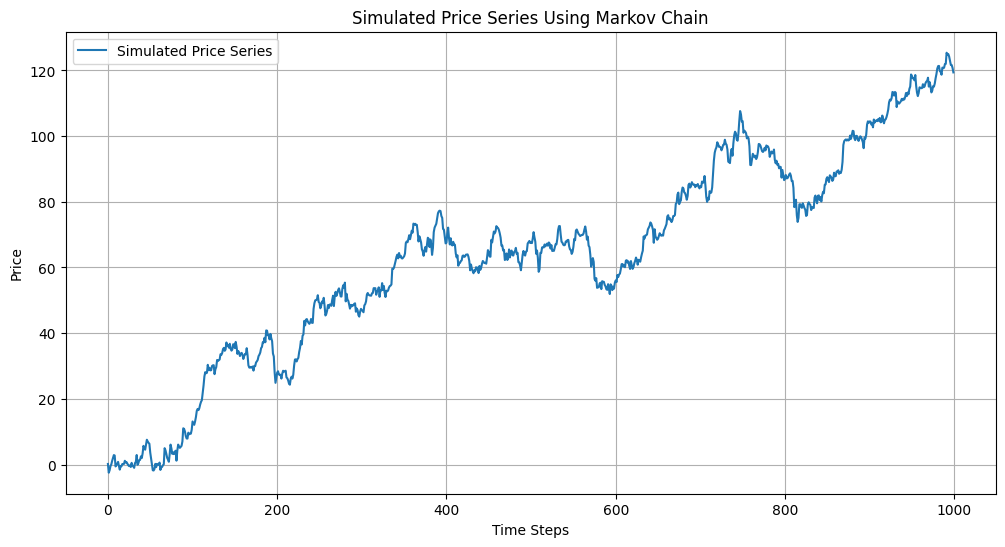

In [9]:
# Plot the price series
plt.figure(figsize=(12, 6))
plt.plot(price_series, label='Simulated Price Series')
plt.title('Simulated Price Series Using Markov Chain')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Step 2: Building a Hidden Markov Model (HMM)
# HMM is used to model the observed price series and infer the hidden state sequence

# Reshape the data for the HMM model
price_series_reshaped = price_series.reshape(-1, 1)

In [11]:
# Define the HMM model with Gaussian emissions
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, tol=0.01)

In [12]:
# Fit the model to the observed price series
log_likelihood = model.fit(price_series_reshaped).score(price_series_reshaped)
print(f"Log Likelihood after training: {log_likelihood}")

Model is not converging.  Current: -4532.681290203611 is not greater than -4494.589314425365. Delta is -38.091975778245796


Log Likelihood after training: -4548.840971394821


In [13]:
# Step 3: Predicting the hidden states using the trained model
hidden_states = model.predict(price_series_reshaped)

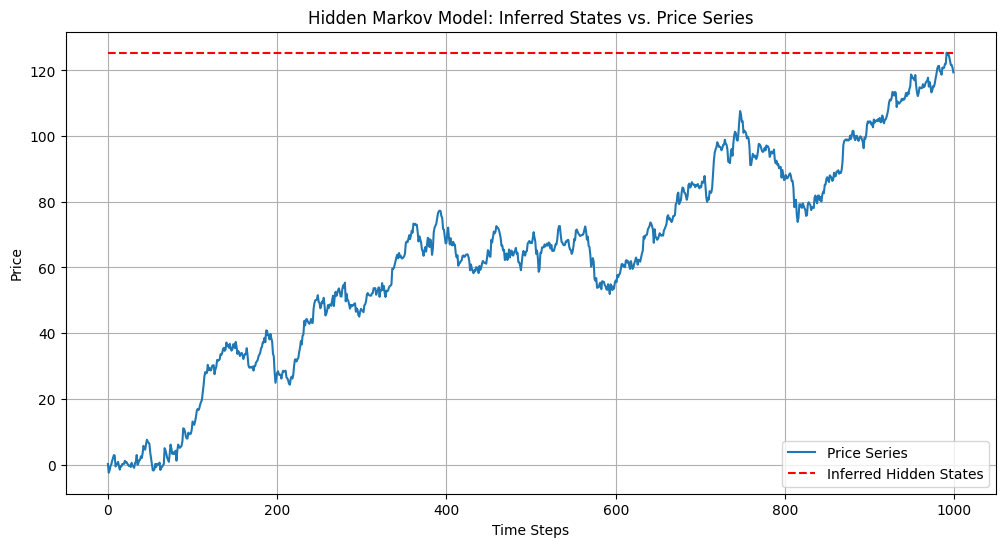

In [14]:
# Visualize the hidden states with the price series
plt.figure(figsize=(12, 6))
plt.plot(price_series, label='Price Series')
plt.plot(hidden_states * max(price_series), label='Inferred Hidden States', linestyle='--', color='red')
plt.title('Hidden Markov Model: Inferred States vs. Price Series')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Step 4: Analyze the log-likelihood of the model
# This evaluates how well the model explains the observed data
logprob = model.score(price_series_reshaped)
print(f"Log Likelihood of the fitted model: {logprob}")

Log Likelihood of the fitted model: -4548.840971394821


In [16]:
# Step 5: Perform Baum-Welch training with multiple iterations
# The Baum-Welch algorithm is used to find the best parameters for the HMM
# We check if the log-likelihood improves with more iterations

# Re-fitting the model with more iterations and tracking convergence
model.n_iter = 200
log_likelihoods = []
for i in range(1, 6):
    model.fit(price_series_reshaped)
    log_likelihood = model.score(price_series_reshaped)
    log_likelihoods.append(log_likelihood)
    print(f"Iteration {i}, Log Likelihood: {log_likelihood}")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Model is not converging.  Current: -4532.681290212675 is not greater than -4494.589314439741. Delta is -38.09197577293344
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Ev

Iteration 1, Log Likelihood: -4548.840971398987


Model is not converging.  Current: -4532.6812902030215 is not greater than -4494.589314452987. Delta is -38.09197575003418
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Iteration 2, Log Likelihood: -4548.840971402995


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Model is not converging.  Current: -4494.589314447533 is not greater than -4404.070685683055. Delta is -90.51862876447831
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Iteration 3, Log Likelihood: -4532.681290205329


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Model is not converging.  Current: -4641.678917727552 is not greater than -4455.079269428517. Delta is -186.59964829903493
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


Iteration 4, Log Likelihood: -4591.024531114133


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Model is not converging.  Current: -4532.681290215402 is not greater than -4494.589314444702. Delta is -38.09197577070063


Iteration 5, Log Likelihood: -4548.840971397146


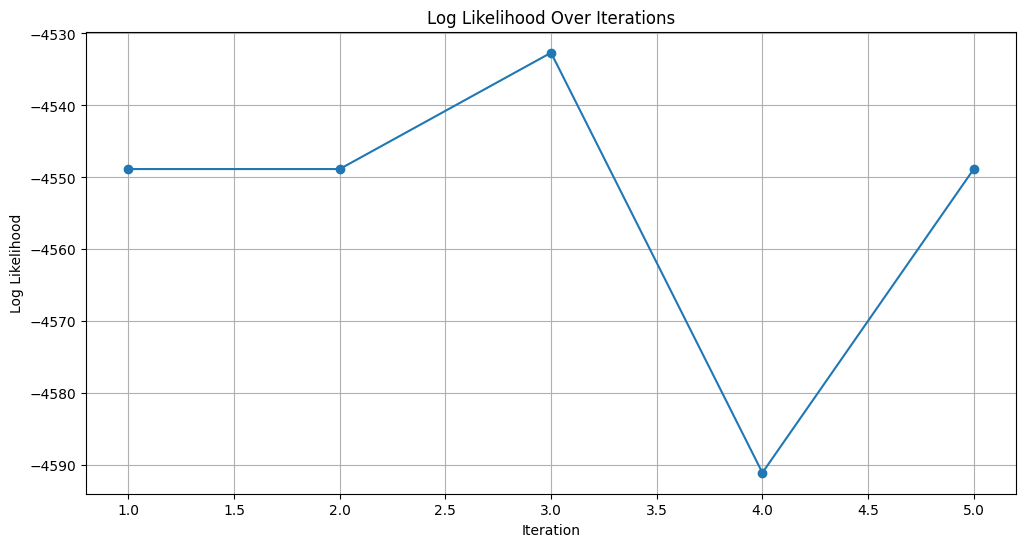

In [17]:
# Plot the log-likelihood over iterations to see convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), log_likelihoods, marker='o')
plt.title('Log Likelihood Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.show()

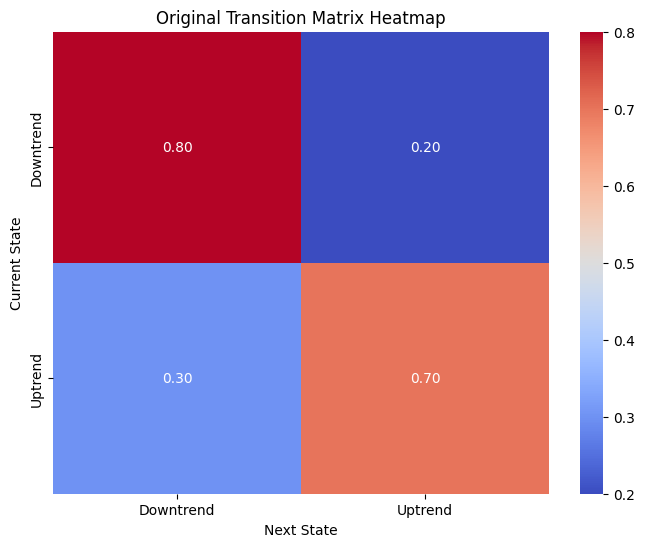

In [18]:
# Step 6: Heatmap of the original transition matrix
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Downtrend', 'Uptrend'],
            yticklabels=['Downtrend', 'Uptrend'])
plt.title('Original Transition Matrix Heatmap')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

In [19]:
# Step 7: Analyzing the transition probabilities inferred by the HMM
learned_transition_matrix = model.transmat_

print("Original Transition Matrix:\n", transition_matrix)
print("Learned Transition Matrix:\n", learned_transition_matrix)

Original Transition Matrix:
 [[0.8 0.2]
 [0.3 0.7]]
Learned Transition Matrix:
 [[0.676917   0.323083  ]
 [0.34307387 0.65692613]]


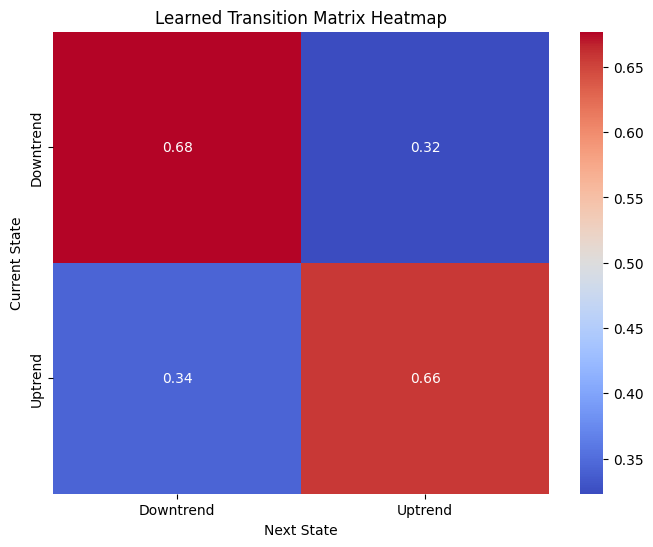

In [20]:
# Heatmap of the learned transition matrix
plt.figure(figsize=(8, 6))
sns.heatmap(learned_transition_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Downtrend', 'Uptrend'],
            yticklabels=['Downtrend', 'Uptrend'])
plt.title('Learned Transition Matrix Heatmap')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

In [21]:
# Step 8: Predicting future price movements based on hidden states
# Use the trained HMM to predict future states and price movements
n_future_steps = 50
future_hidden_states = []

In [22]:
# Predict the future hidden states
last_hidden_state = hidden_states[-1]
for _ in range(n_future_steps):
    future_hidden_state = np.random.choice(states, p=model.transmat_[last_hidden_state])
    future_hidden_states.append(future_hidden_state)
    last_hidden_state = future_hidden_state

In [23]:
# Simulate future price movements based on the predicted hidden states
future_price_movements = np.random.randn(n_future_steps) * (np.array(future_hidden_states) + 1)
future_price_series = np.cumsum(future_price_movements) + price_series[-1]

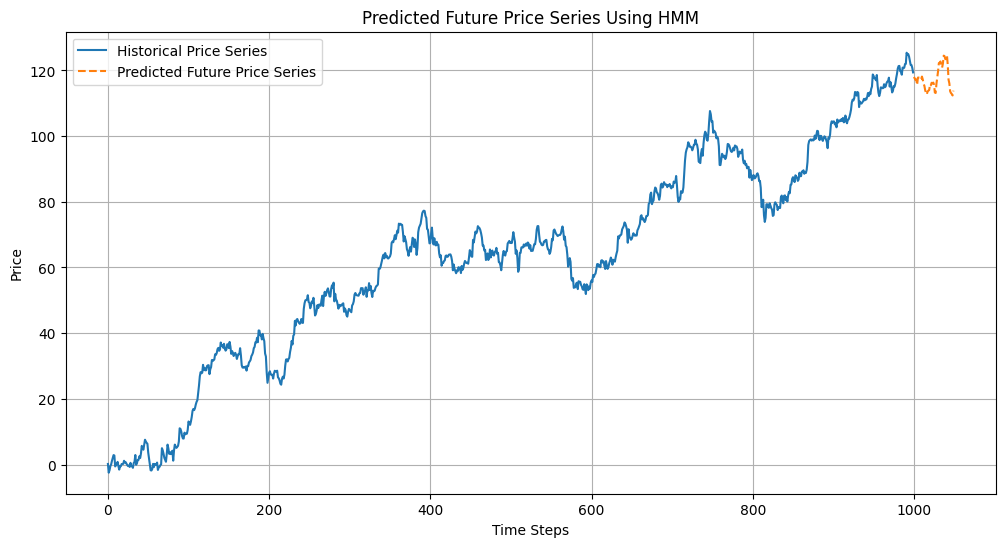

In [24]:
# Plot the future price predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_steps), price_series, label='Historical Price Series')
plt.plot(np.arange(n_steps, n_steps + n_future_steps), future_price_series, label='Predicted Future Price Series', linestyle='--')
plt.title('Predicted Future Price Series Using HMM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Instead of Gaussian emissions, consider using other distributions like Student's t-distribution or mixtures of Gaussians to capture more complex patterns in price movements.

In [25]:
# Set random seed for reproducibility
np.random.seed(42)

In [26]:
# Step 1: Generating synthetic price movement data using Markov Chains
states = np.array([0, 1])
transition_matrix = np.array([[0.8, 0.2],
                              [0.3, 0.7]])

In [27]:
n_steps = 1000
state_sequence = [np.random.choice(states, p=[0.5, 0.5])]
for _ in range(1, n_steps):
    current_state = state_sequence[-1]
    next_state = np.random.choice(states, p=transition_matrix[current_state])
    state_sequence.append(next_state)

In [28]:
price_movements = np.random.randn(n_steps) * (np.array(state_sequence) + 1)
price_series = np.cumsum(price_movements)

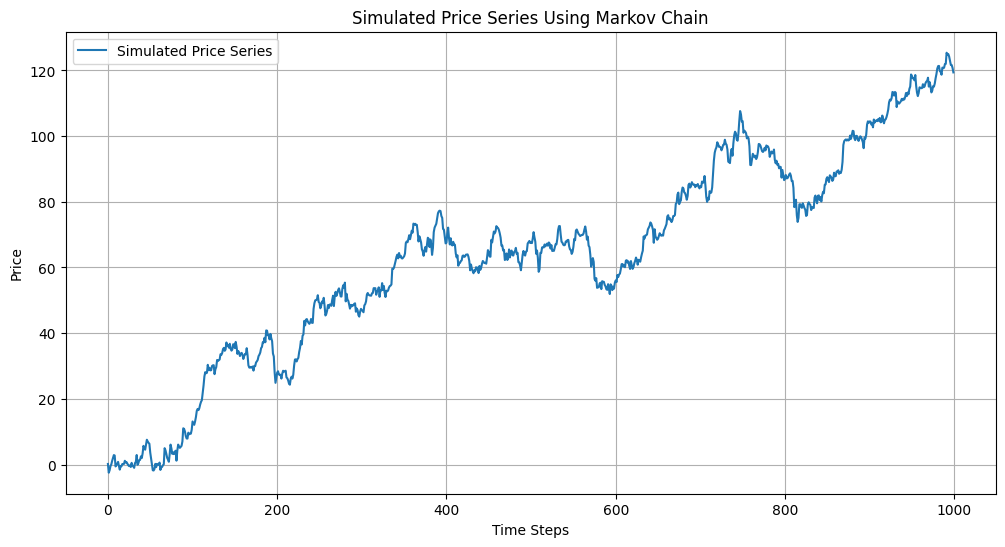

In [29]:
# Plot the price series
plt.figure(figsize=(12, 6))
plt.plot(price_series, label='Simulated Price Series')
plt.title('Simulated Price Series Using Markov Chain')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Step 2: Building a Hidden Markov Model (HMM)
price_series_reshaped = price_series.reshape(-1, 1)

In [31]:
# Standardize the data
scaler = StandardScaler()
price_series_scaled = scaler.fit_transform(price_series_reshaped)

In [32]:
# Define HMM with Gaussian emissions
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, tol=0.01)

In [33]:
# Fit the model to the observed price series
try:
    model.fit(price_series_scaled)
    log_likelihood = model.score(price_series_scaled)
    print(f"Log Likelihood after training: {log_likelihood}")
except Warning as e:
    print(f"Convergence warning: {e}")

Model is not converging.  Current: -1087.6903226544248 is not greater than -1049.5886081624108. Delta is -38.101714492014025


Log Likelihood after training: -1103.8126768627083


In [34]:
# Step 3: Predicting the hidden states using the trained model
hidden_states = model.predict(price_series_scaled)

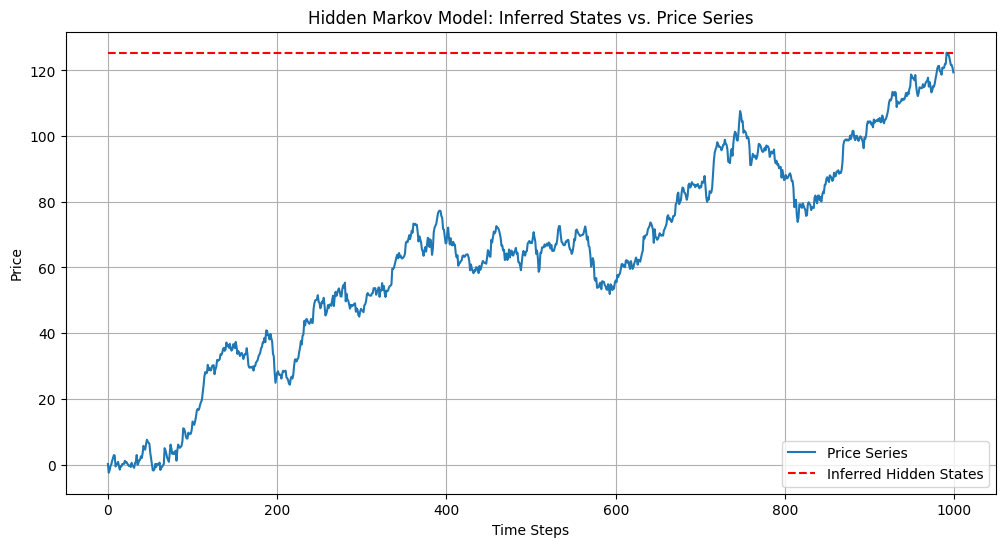

In [35]:
# Visualize the hidden states with the price series
plt.figure(figsize=(12, 6))
plt.plot(price_series, label='Price Series')
plt.plot(hidden_states * max(price_series), label='Inferred Hidden States', linestyle='--', color='red')
plt.title('Hidden Markov Model: Inferred States vs. Price Series')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Step 4: Analyze the log-likelihood of the model
logprob = model.score(price_series_scaled)
print(f"Log Likelihood of the fitted model: {logprob}")

Log Likelihood of the fitted model: -1103.8126768627083


In [37]:
# Step 5: Perform Grid Search for Hyperparameter Tuning
param_grid = {
    'n_components': [2, 3, 4],
    'covariance_type': ['diag', 'spherical', 'tied', 'full']
}

In [38]:
# Create a custom scorer for GridSearchCV
def log_loss_scorer(estimator, X):
    try:
        return -estimator.score(X)
    except:
        return np.nan

grid_search = GridSearchCV(estimator=hmm.GaussianHMM(), param_grid=param_grid, scoring=log_loss_scorer, cv=3)
grid_search.fit(price_series_scaled)
print("Best Parameters:", grid_search.best_params_)

Model is not converging.  Current: -262.0466452909307 is not greater than -261.9240985910967. Delta is -0.1225466998340039
Model is not converging.  Current: -340.8204794830314 is not greater than -39.70847983406222. Delta is -301.11199964896923
Model is not converging.  Current: -609.2051996608448 is not greater than -548.5081175205767. Delta is -60.697082140268094
Model is not converging.  Current: -373.0463167872717 is not greater than -211.45746070633285. Delta is -161.58885608093883
Model is not converging.  Current: -890.1700141820553 is not greater than -809.5928857888754. Delta is -80.57712839317992
Model is not converging.  Current: -622.3210912057774 is not greater than -596.3657104303429. Delta is -25.95538077543449
Model is not converging.  Current: -262.0466452909301 is not greater than -261.9240985911721. Delta is -0.12254669975800425
Model is not converging.  Current: -519.0220727035716 is not greater than -450.2995714175252. Delta is -68.72250128604634
Model is not conv

Best Parameters: {'covariance_type': 'spherical', 'n_components': 2}


In [39]:
# Step 6: Use Student's t-distribution for emissions
class StudentTEmissionHMM(hmm.GaussianHMM):
    def _do_e_step(self):
        super()._do_e_step()
        self.means_ = np.mean(price_series_scaled, axis=0)
        self.covars_ = np.cov(price_series_scaled, rowvar=False)
        self.covars_ = student_t(df=5).rvs(size=self.covars_.shape)

In [40]:
# Define the HMM with Student's t-distribution emissions
model_t = StudentTEmissionHMM(n_components=2, covariance_type="diag", n_iter=100, tol=0.01)
model_t.fit(price_series_scaled)
log_likelihood_t = model_t.score(price_series_scaled)
print(f"Log Likelihood with Student's t-distribution: {log_likelihood_t}")

Model is not converging.  Current: -1087.6903226530644 is not greater than -1049.5886081705899. Delta is -38.10171448247456


Log Likelihood with Student's t-distribution: -1103.8126768620978


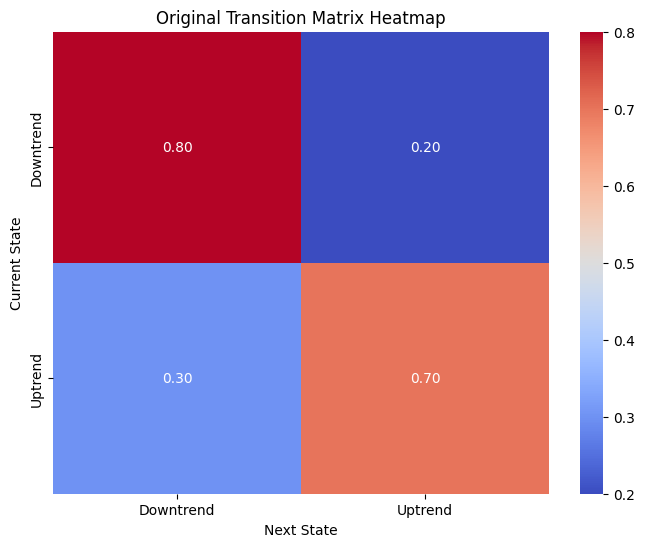

In [41]:
# Step 7: Heatmap of the original transition matrix
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Downtrend', 'Uptrend'],
            yticklabels=['Downtrend', 'Uptrend'])
plt.title('Original Transition Matrix Heatmap')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

In [42]:
# Step 8: Analyzing the transition probabilities inferred by the HMM
learned_transition_matrix = model.transmat_
print("Original Transition Matrix:\n", transition_matrix)
print("Learned Transition Matrix:\n", learned_transition_matrix)

Original Transition Matrix:
 [[0.8 0.2]
 [0.3 0.7]]
Learned Transition Matrix:
 [[0.67676967 0.32323033]
 [0.34319218 0.65680782]]


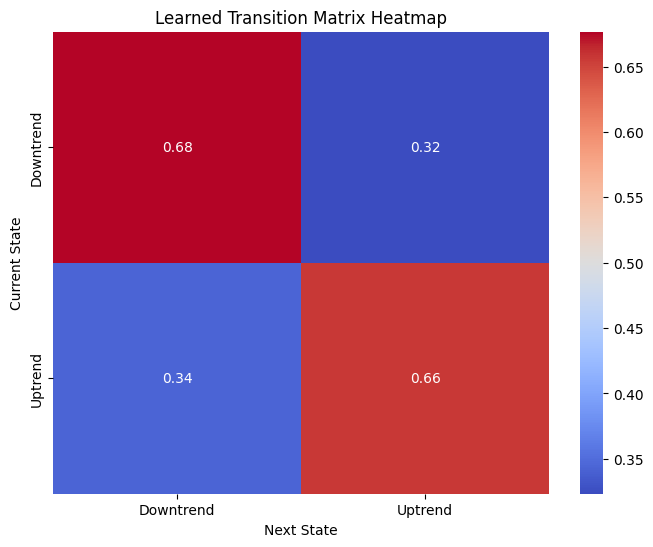

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(learned_transition_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Downtrend', 'Uptrend'],
            yticklabels=['Downtrend', 'Uptrend'])
plt.title('Learned Transition Matrix Heatmap')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

In [44]:
# Step 9: Predicting future price movements based on hidden states
n_future_steps = 50
future_hidden_states = []
last_hidden_state = hidden_states[-1]
for _ in range(n_future_steps):
    future_hidden_state = np.random.choice(states, p=model.transmat_[last_hidden_state])
    future_hidden_states.append(future_hidden_state)
    last_hidden_state = future_hidden_state

In [45]:
future_price_movements = np.random.randn(n_future_steps) * (np.array(future_hidden_states) + 1)
future_price_series = np.cumsum(future_price_movements) + price_series[-1]

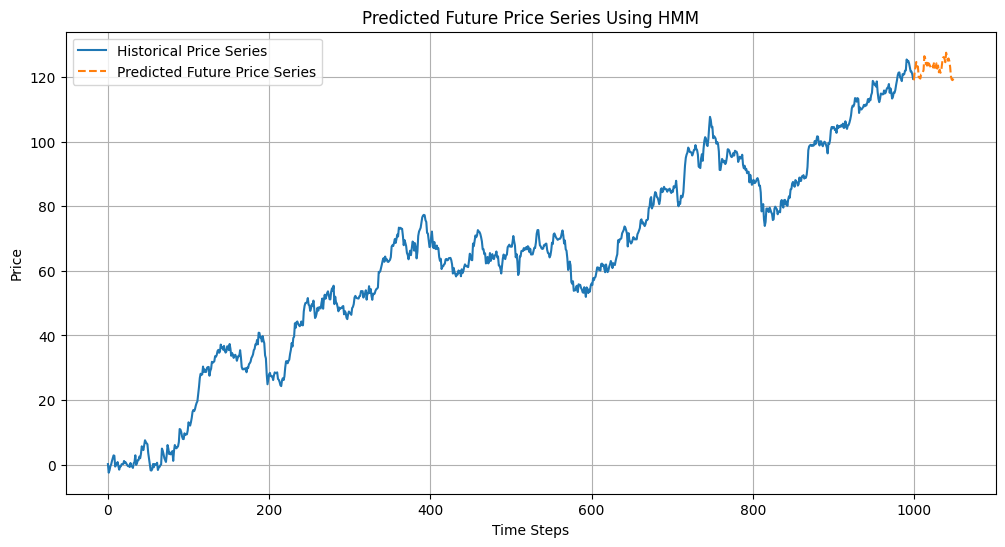

In [46]:
# Plot the future price predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_steps), price_series, label='Historical Price Series')
plt.plot(np.arange(n_steps, n_steps + n_future_steps), future_price_series, label='Predicted Future Price Series', linestyle='--')
plt.title('Predicted Future Price Series Using HMM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()